In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.ExcelFile(file_path)

Saving Scatter_plot.xlsx to Scatter_plot.xlsx


In [4]:
# Read Sheet1
df = data.parse('Sheet2')
display(df.head())

,Gene Name,HNOX_1,HNOX_2,HNOX_3,WT_1,WT_2,WT_3
0,Pden_0444,NaN,NaN,NaN,23.918980,23.916978,23.839325
1,ppk,NaN,NaN,NaN,21.155176,21.264649,21.302012
2,Pden_4022,NaN,NaN,NaN,21.989192,22.003057,21.850336
3,Pden_4104,NaN,NaN,NaN,22.187583,22.303880,22.094326
4,Pden_0682,NaN,NaN,NaN,21.090423,20.823377,21.000652


In [5]:
# Select replicate columns
numeric_cols = ['HNOX_1','HNOX_2','HNOX_3','WT_1','WT_2','WT_3',]

# Clean NaN/inf
#clean_data = df[numeric_cols].replace([np.inf, -np.inf], np.nan).dropna()
clean_data = df[numeric_cols].dropna()

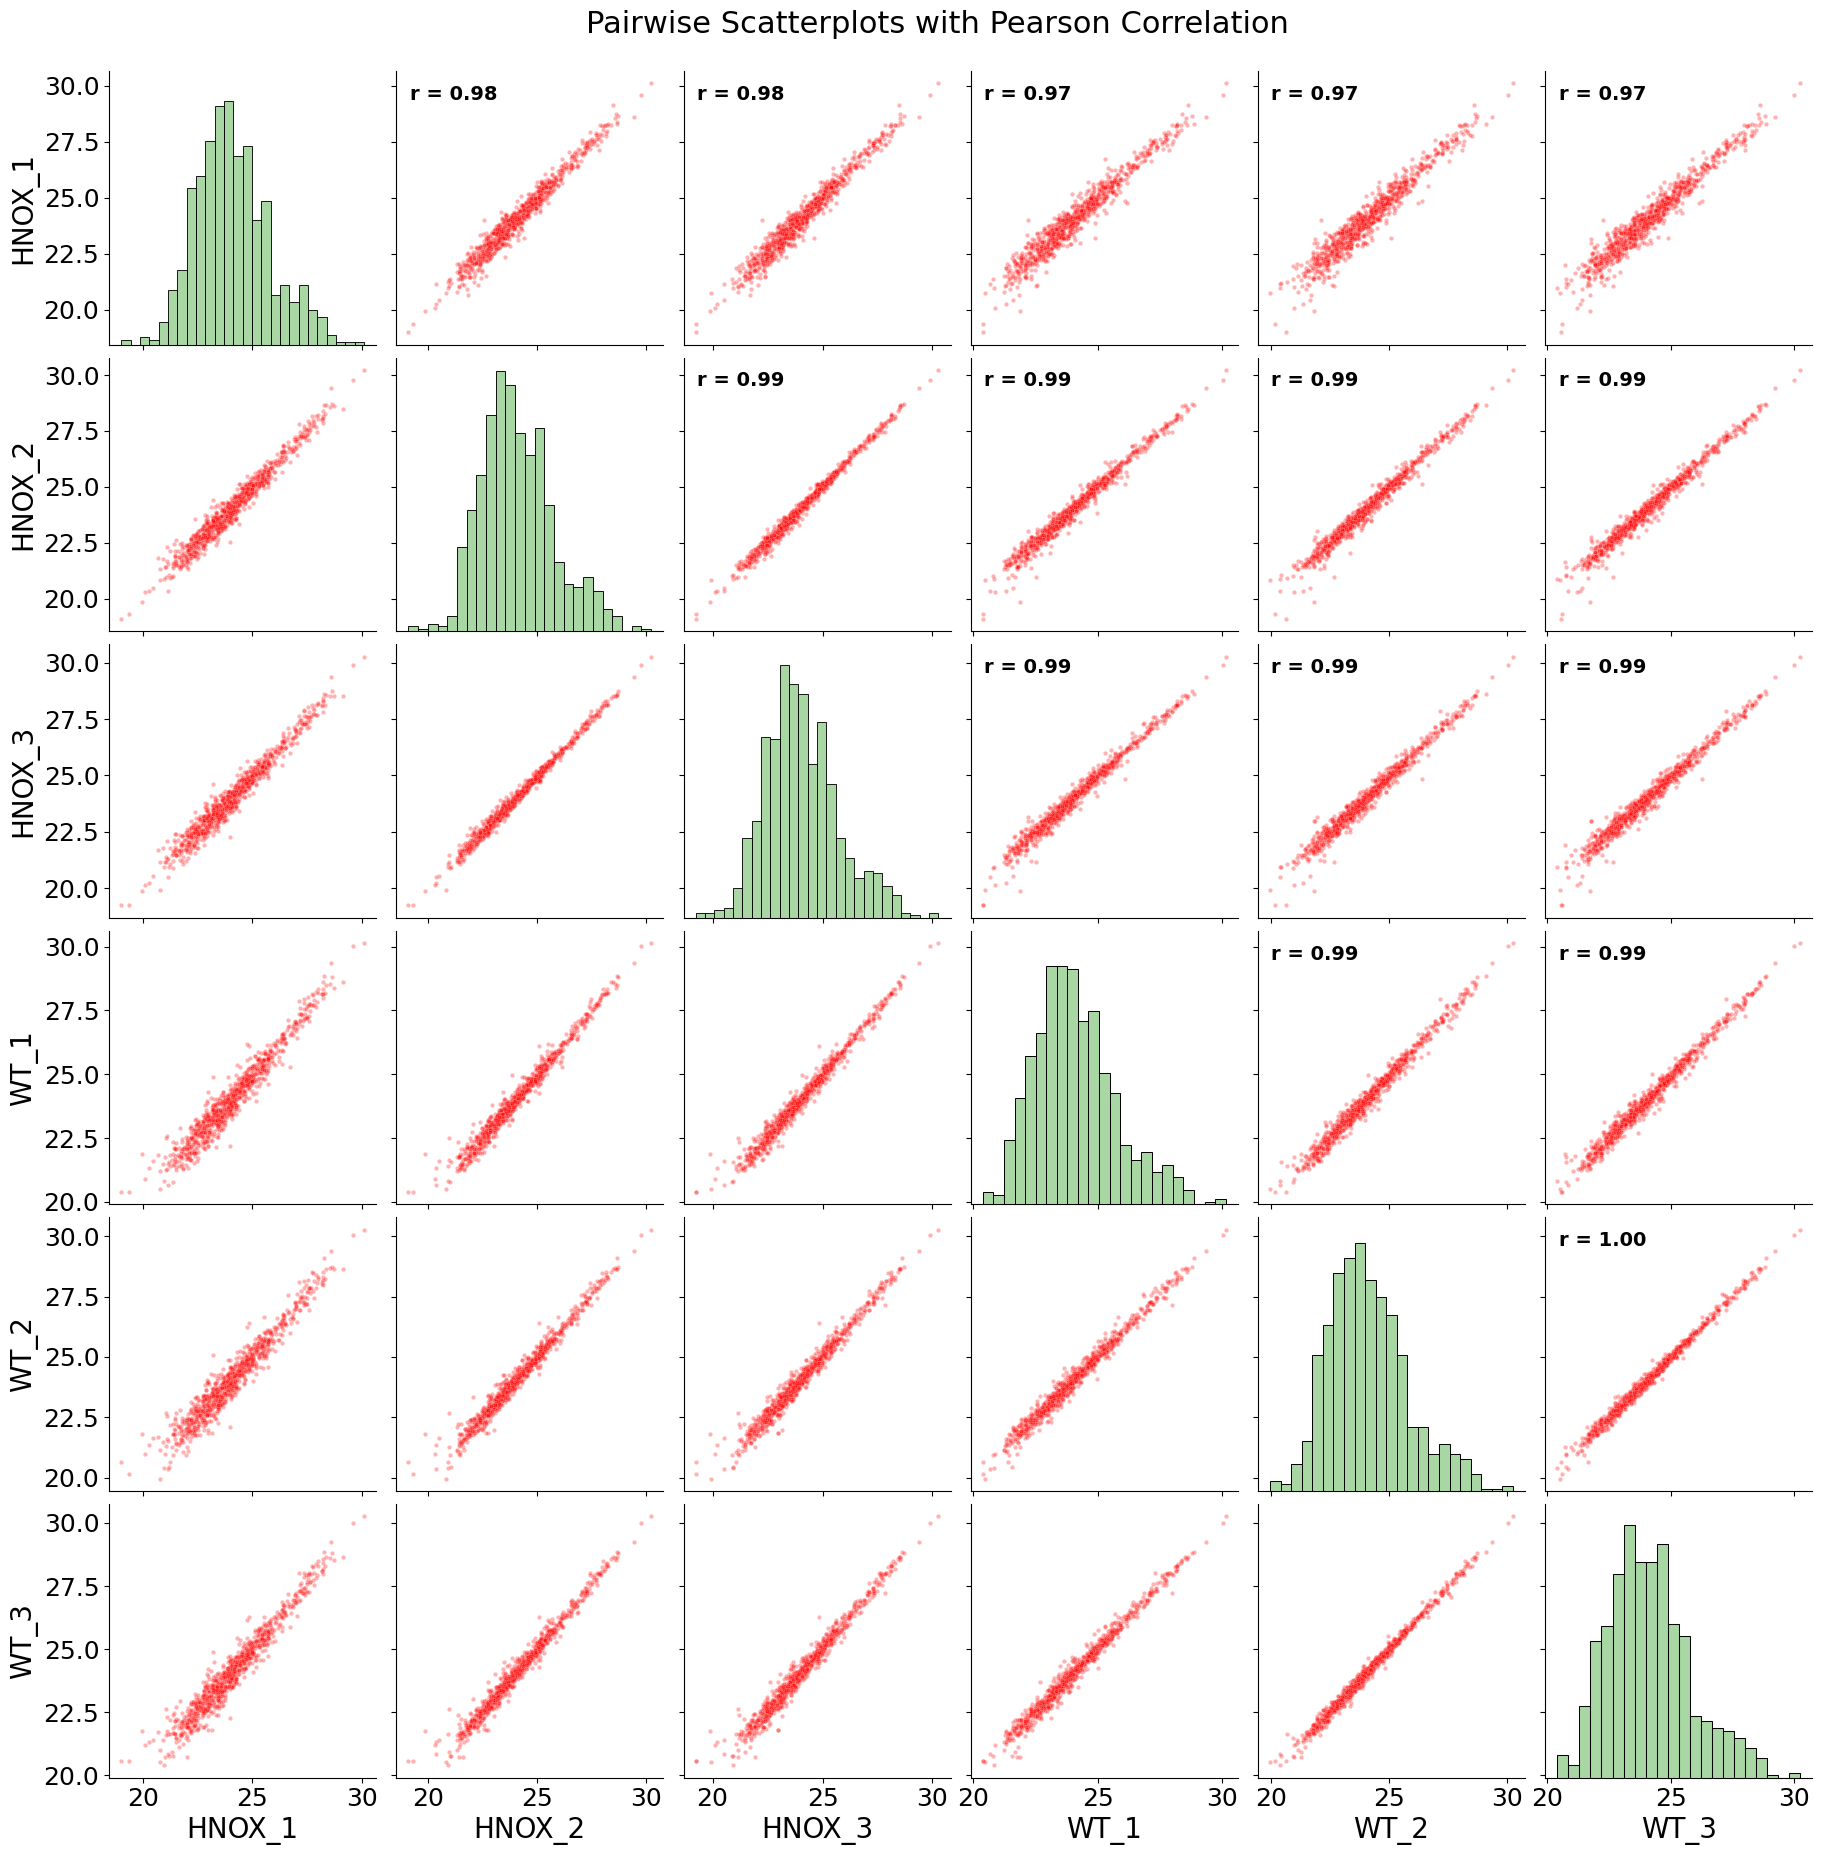

In [6]:
# STEP 5: Define correlation annotator
def corrfunc(x, y, **kws):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f"r = {r:.2f}", xy=(0.05, 0.95), xycoords=ax.transAxes,
                ha='left', va='top', fontsize=14, fontweight='bold')

# STEP 6: Create pairplot
g = sns.pairplot(clean_data, diag_kind="hist",
                 plot_kws={'alpha':0.3, 's':10, 'color': 'red'}, # Added color parameter for scatter plots
                 diag_kws={'color': "#8bca84"}, height=3) # Added height parameter to control figure size
g.map_upper(corrfunc)

# Increase axis label (title) font size
for ax in g.axes.flatten():
    if ax is not None:  # some upper panels can be empty
        ax.set_xlabel(ax.get_xlabel(), fontsize=20)
        ax.set_ylabel(ax.get_ylabel(), fontsize=20)
        ax.tick_params(axis='both', labelsize=18)


plt.suptitle("Pairwise Scatterplots with Pearson Correlation",
             y=1.02, fontsize=22)

# Step 10: Save the figure
png_path = 'Multi_Pro_p_den_od_2.png'
pdf_path = 'Multi_Pro_p_den_od_2.pdf'
plt.savefig(png_path, dpi=300, bbox_inches='tight')
plt.savefig(pdf_path, bbox_inches='tight')
plt.show()